##  캘리포니아 집값 예측하기
#### Y = WX + b

In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('./datasets/housing.csv')
df.shape
#df = df.sample(1000) #데이터 1천개 제한
df = df.iloc[:1000]

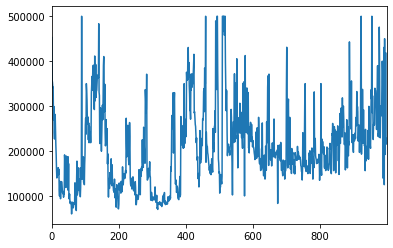

In [40]:
df['median_house_value'].plot()

In [41]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [42]:
#누락 확인, 평균값으로 채우자
df.isna().sum(), df['total_bedrooms'].mean()

(longitude             0
 latitude              0
 housing_median_age    0
 total_rooms           0
 total_bedrooms        6
 population            0
 households            0
 median_income         0
 median_house_value    0
 ocean_proximity       0
 dtype: int64, 485.16901408450707)

In [43]:
# 평균값으로 채워서 덮어쓴다
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.isna().sum().sum()

0

In [44]:
#카테고리 컬럼은 원핫 인코딩 전처리를 한다
data = pd.get_dummies(df)

In [45]:
y = data['median_house_value']
x = data.drop(columns='median_house_value')
#위도 경도도 빼고
x = x.iloc[:, 2:]
x.shape, y.shape

((1000, 9), (1000,))

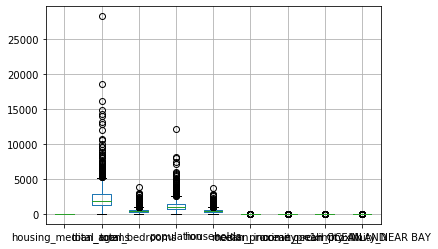

In [46]:
x.boxplot()

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
model.coef_.shape, model.intercept_
model.score(x, y)

0.6323701578901336

In [48]:
x = np.array(x)
y = np.array(y)
xn = (x - np.min(x, 0))/(np.max(x, 0)-np.min(x, 0)) #min-max 정규화
yn = (y - np.min(y, 0))/(np.max(y, 0)-np.min(y, 0))
yn = np.reshape(yn, [-1,1])

In [49]:
col = x.shape[1]
col

9

In [50]:
w = tf.Variable(tf.random_normal(shape=[col])) 
b = tf.Variable(0.01) 
hypothesis = tf.reduce_sum(w * xn, axis=1, keepdims=True) + b #가설
cost = tf.reduce_mean((yn - hypothesis)**2)  #  y(5,1), h(5,1)
learning_rate = 0.01 #학습률
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())#변수 초기화, c의 malloc 과 동일

In [ ]:
for i in range(10000): #에포크(iteration) : 몇번 변수를 업데이트 하느냐
    sess.run(train)
    if i%1000==0:
        print(i, sess.run(cost))

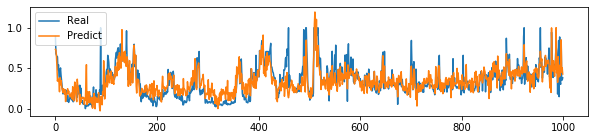

In [52]:
p = sess.run(hypothesis) #예측
plt.figure(figsize=(10,2))
plt.plot(yn[:], label='Real')
plt.plot(p[:], label='Predict')
plt.legend()